## This notebook shows how to open HDF5 data files (produced in DD4Hep), and plot hit distributions. Includes a map of the index within the  file to the variables of interest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

from sklearn.preprocessing import StandardScaler

import h5py as h5

from IPython.display import display_html 

In [2]:
#Prints Map of Index to Variable in the H5 File
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("color", 'black')])]    # the color value can not be None

df1 = pd.DataFrame({'Hit E':[0],'Hit X':[1],'Hit Y':[2],'Hit Z':[3]},index=['Index'])
df2 = pd.DataFrame({'mcPDG':[0], 'mcSimulatorStatus':[1], 'mcGeneratorStatus':[2],'mcPX':[3],
                    'mcPY':[4],'mcPZ':[5],'mcMass':[6],'mcPT':[7],'mcP':[8],'mcTheta':[9]},index=['Index'])
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('[Calorimeter Hit]')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('[Truth Particle]')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

[Calorimeter Hit] 
 
 
   
 Hit E 
 Hit X 
 Hit Y 
 Hit Z 
 
 
 
 
 Index 
 0 
 1 
 2 
 3 
 
 
 

 
 [Truth Particle] 
 
 
   
 mcPDG 
 mcSimulatorStatus 
 mcGeneratorStatus 
 mcPX 
 mcPY 
 mcPZ 
 mcMass 
 mcPT 
 mcP 
 mcTheta 
 
 
 
 
 Index 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9

## Get data

In [4]:
filename = 'rec_piplus_1k.hdf5'
#filename = 'rec_pionplus_300k.hdf5'
#filename = 'rec_pionplus_vartheta.hdf5'
h5_file = h5.File(filename,'r')
print(list(h5_file.keys()))

ecal = h5_file['ecal']
hcal = h5_file['hcal']
mc = h5_file['mc']

print(hcal.shape)
print(hcal.chunks) #important for TF batch_size

['ecal', 'hcal', 'mc']
(1000, 4, 659)
(100, 4, 659)


In [5]:
N_Events = 10_000

hcal_E = hcal[:N_Events,0]
hcal_X = hcal[:N_Events,1]
hcal_Y = hcal[:N_Events,2]
hcal_Z = hcal[:N_Events,3]

ecal_E = ecal[:N_Events,0]
ecal_X = ecal[:N_Events,1]
ecal_Y = ecal[:N_Events,2]
ecal_Z = ecal[:N_Events,3]
#NOTE: This pulls everything into memory.
#This is OK for small files, but the benefit
#Of hdf5 is the ability to slice the file,
#just as you would a numpy array.

In [6]:
print("HCal E",np.nanmean(hcal_E.flatten().reshape(-1, 1)), "+/-", np.nanstd(hcal_E.flatten().reshape(-1, 1)))
print("HCal X",np.nanmean(hcal_X.flatten().reshape(-1, 1)), "+/-", np.nanstd(hcal_X.flatten().reshape(-1, 1)))
print("HCal Y",np.nanmean(hcal_Y.flatten().reshape(-1, 1)), "+/-", np.nanstd(hcal_Y.flatten().reshape(-1, 1)))
print("HCal Z",np.nanmean(hcal_Z.flatten().reshape(-1, 1)), "+/-", np.nanstd(hcal_Z.flatten().reshape(-1, 1)))

print("ECal E",np.nanmean(ecal_E.flatten().reshape(-1, 1)), "+/-", np.nanstd(ecal_E.flatten().reshape(-1, 1)))
print("ECal X",np.nanmean(ecal_X.flatten().reshape(-1, 1)), "+/-", np.nanstd(ecal_X.flatten().reshape(-1, 1)))
print("ECal Y",np.nanmean(ecal_Y.flatten().reshape(-1, 1)), "+/-", np.nanstd(ecal_Y.flatten().reshape(-1, 1)))
print("ECal Z",np.nanmean(ecal_Z.flatten().reshape(-1, 1)), "+/-", np.nanstd(ecal_Z.flatten().reshape(-1, 1)))

HCal E 67.88557 +/- 163.57016
HCal X -50.241394 +/- 200.35536
HCal Y -745.6021 +/- 216.13638
HCal Z 4180.129 +/- 271.54285
ECal E 30.862455 +/- 54.618587
ECal X -42.42237 +/- 354.74335
ECal Y -666.74646 +/- 360.70203
ECal Z 3584.9998 +/- 0.00024414062


Text(0.5, 0, 'Number of Hits')

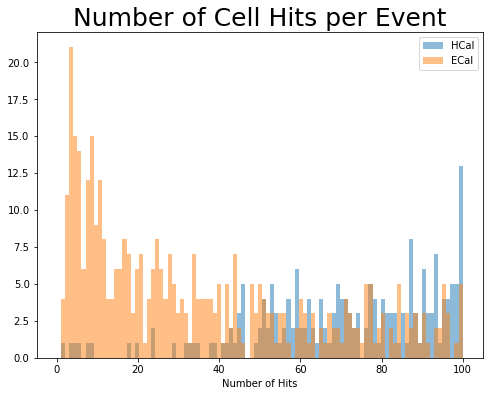

In [7]:
#fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=False,sharey=False)
fig = plt.figure(figsize=(8,6))
plt.title("Number of Cell Hits per Event",fontsize=25)
count_binning = np.linspace(0,100,100)
plt.hist(np.count_nonzero(~np.isnan(hcal_E),axis=1),bins=count_binning,alpha=0.5,label='HCal')
plt.hist(np.count_nonzero(~np.isnan(ecal_E),axis=1),bins=count_binning,alpha=0.5,label='ECal')
plt.legend()
plt.xlabel("Number of Hits")

In [8]:
counts = np.count_nonzero(~np.isnan(hcal_E),axis=1)
print(counts)
mask = counts<2
print(np.where(mask==True))

[133 221 252  91 129 181 154 245 104 114  51 162  69  86  97 107 175  87
 160 156 181 242 118 138 100 193 155 134 166 127 129 171  68 215 219  53
 160  93  77 211  55 219 188  99  70  99 170 203 151 157 187 211 210 148
 152  82  91   6  88  90 172 182 131 182 111 104 171  62 134 154 119 104
 182 161 119 168 201  87 155 115 134 227 175  90 226 161 204 156  65 152
  53 182  67 129 138 184 212 181 186 207 204 192 116 179  52 118 109 237
 137  92  96 200 110 228 185 202  59 151 149 168  54 146 111 106 204 214
 124  53 168 183  53 226  65  68 212 184 143 100 201 156 189 208 174 152
 145 139 154 122 212 107 144 201 175 140  58  53  74 114 240 131 120 241
 242  79 137 113 153 176 260 159 131 253 128 175  87 163  98 201 163 242
 172 195 196  56 164 187 267 262 116 199 156 205 225 122 227 157  88 208
 163  90 175 239  80 222  42 101  39 113  59 129 119 282 145 197 231 196
 170 189 104 109 258 152 207  93 208 114  72 213 120 130 152 142 115 242
 195 138  77  61 143 162 151 242 164  93 246 179 11

## Hit postion distributions

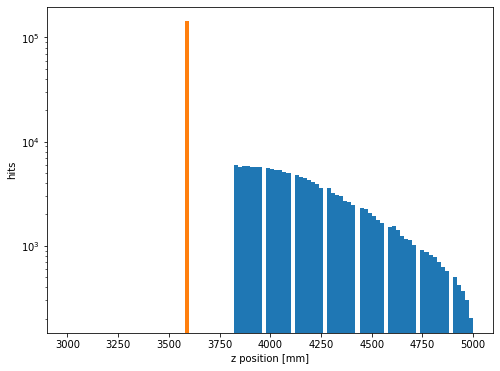

In [9]:
E_index = 0

fig = plt.figure( figsize=(8, 6))

#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60)
#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60)
plt.hist(hcal_Z.flatten(),bins=100, range=(3000,5000),label='HCAL')
plt.hist(ecal_Z.flatten(),bins=100, range=(3000,5000),label='ECAL')
#plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.position.z']),bins=100,range=(3000,5000), label='ECAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.show()

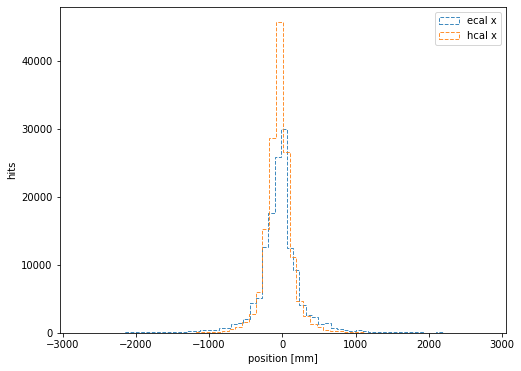

In [10]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ecal_X.flatten(),bins=60,label='ecal x',alpha=0.85,histtype='step',linestyle="--")
#plt.hist(ecal_Y.flatten(),bins=60, label='ecal y',alpha=0.85,histtype='step')
plt.hist(hcal_X.flatten(),bins=60,label='hcal x',alpha=0.85,histtype='step',linestyle="--")
#plt.hist(hcal_Y.flatten(),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

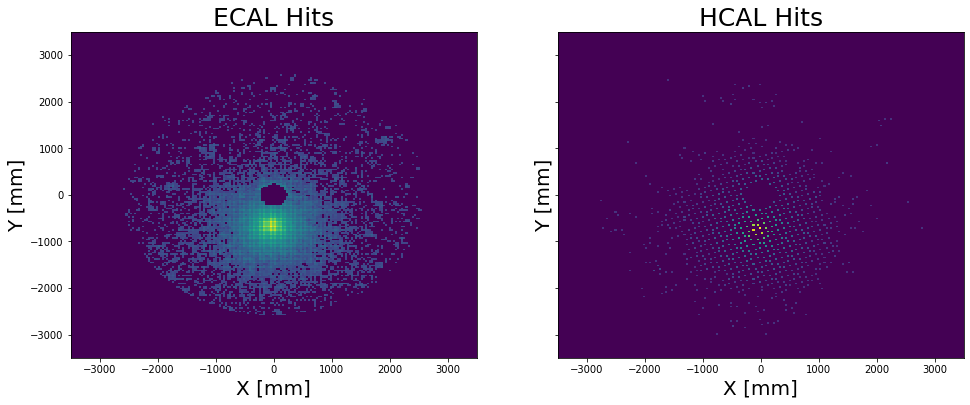

In [11]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ecal_X.flatten()
y = ecal_Y.flatten()
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))
plt.yticks(fontsize=20)
plt.xticks(fontsize=10)

x = hcal_X.flatten()
y = hcal_Y.flatten()
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))

ax[1].set_xlabel("X [mm]",fontsize=20)
ax[1].set_ylabel("Y [mm]",fontsize=20)
ax[1].set_title('HCAL Hits',fontsize=25)
ax[0].set_title('ECAL Hits',fontsize=25)
ax[0].set_xlabel("X [mm]",fontsize=20)
ax[0].set_ylabel("Y [mm]",fontsize=20)

#plt.show()
plt.savefig("cal_XY.pdf")

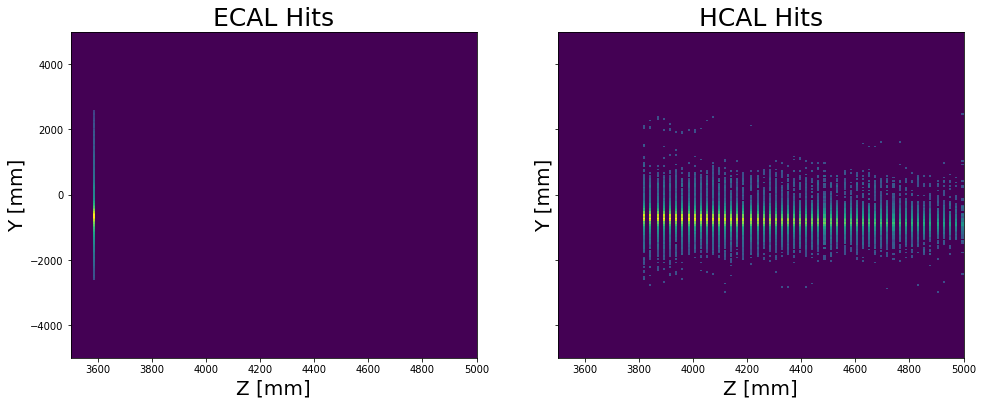

In [12]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
z = ecal_Z.flatten()
y = ecal_Y.flatten()
ax[0].hist2d(np.array(z),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

z = hcal_Z.flatten()
y = hcal_Y.flatten()
ax[1].hist2d(np.array(z),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('Z [mm]',fontsize=20)
ax[1].set_xlabel('Z [mm]',fontsize=20)
ax[0].set_ylabel('Y [mm]',fontsize=20)
ax[1].set_ylabel('Y [mm]',fontsize=20)

ax[1].set_title('HCAL Hits',fontsize=25)
ax[0].set_title('ECAL Hits',fontsize=25)

plt.savefig("cal_YZ.pdf")

## Hit energy distributions

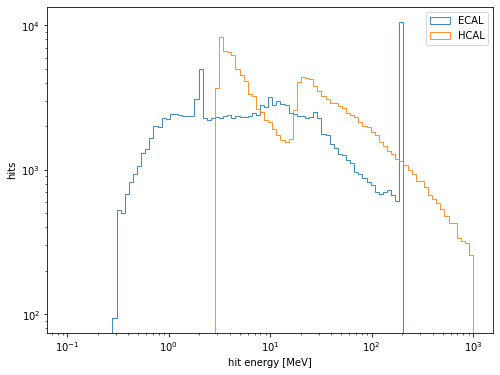

In [13]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ecal_E.flatten(),bins=np.geomspace(0.1,1000,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(hcal_E.flatten(),bins=np.geomspace(0.1,1000,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [14]:
print(np.mean(ecal_E.flatten()))

nan


In [25]:
HCALhits = hcal_E
print(np.shape(hcal_E))
HCAL_total = np.nansum(HCALhits,axis=-1)
HCAL_average = np.nanmean(HCALhits,axis=-1)
HCAL_nhits = np.zeros(np.shape(hcal_E)[0])
for i,event in enumerate(hcal_E):
    HCAL_nhits[i] = np.sum(~np.isnan(event))

#print('total HCAL energy' , HCAL_total)
#print('Average hit energy in HCAL' , HCAL_average)


ECALhits = ecal_E
ECAL_total = np.nansum(ECALhits,axis=-1)
ECAL_average = np.nanmean(ECALhits,axis=-1)
ECAL_nhits = np.zeros(np.shape(hcal_E)[0])
for i,event in enumerate(ecal_E):
    ECAL_nhits[i] = np.sum(~np.isnan(event))

#print('total ECAL energy[MeV]' , ECAL_total)
#print('Average hit energy in ECAL [MeV]' , ECAL_average)

(1000, 659)


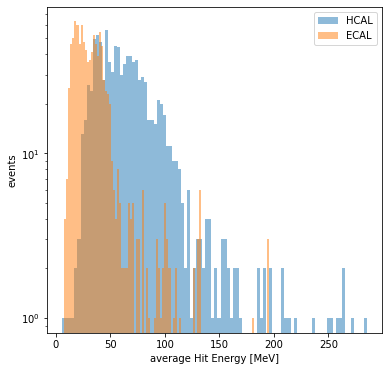

In [26]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_average,bins=100,alpha=0.5,label='HCAL')
plt.hist(ECAL_average,bins=100,alpha=0.5,label='ECAL')

plt.xlabel('average Hit Energy [MeV]')
plt.ylabel('events')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


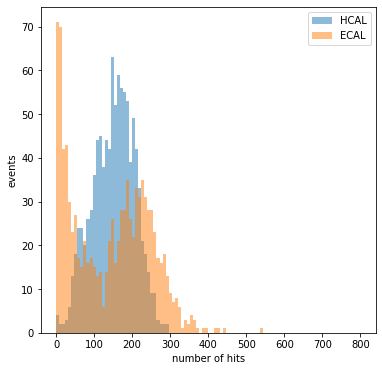

In [17]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,800),label='HCAL')
plt.hist(ECAL_nhits,bins=100,alpha=0.5,range=(0,800),label='ECAL')

plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [18]:
px = mc[:,3]
py = mc[:,4]
pz = mc[:,5]
mass = mc[:,6]
gen_theta = mc[:,9]

p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

In [19]:
hcal_E = hcal[:,0]
ecal_E = ecal[:,0]

[ 4569.763  15697.998  14365.174   7728.0884  4987.793 ]
[18591.127     459.2594    640.4349    433.97684  5431.1704 ]
[23160.89   16157.258  15005.608   8162.0654 10418.963 ]
[19.867977 19.8666   19.861368 19.862392 19.851215]


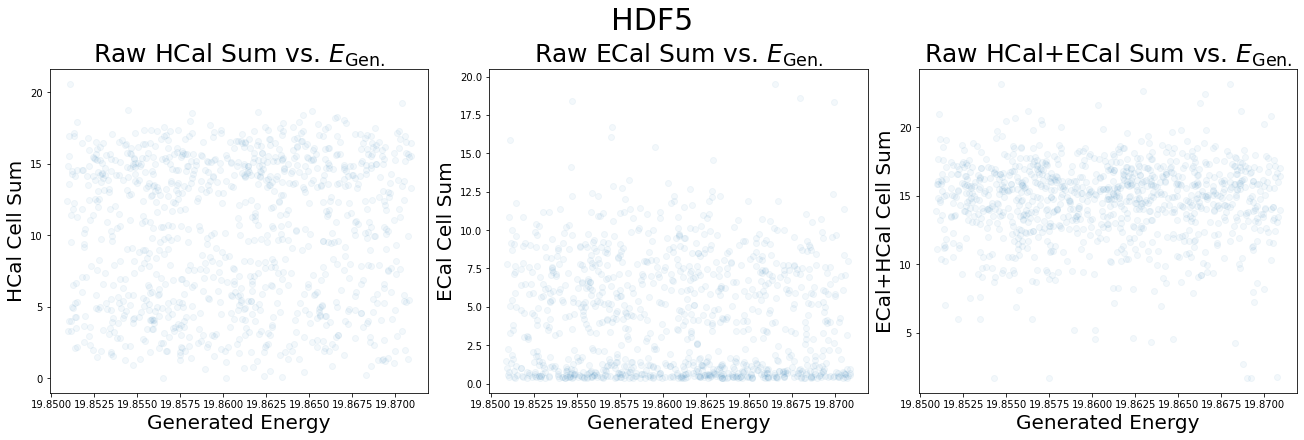

In [30]:
hcal_clusterSum = np.nansum(hcal_E,axis=-1)
ecal_clusterSum = np.nansum(ecal_E,axis=-1)
cluster_sum = hcal_clusterSum + ecal_clusterSum
print(hcal_clusterSum[:5])
print(ecal_clusterSum[:5])
print(cluster_sum[:5])
print(gen_E[:5,0])


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

axes[0].scatter(gen_E[:,0],hcal_clusterSum/1000,alpha=0.05)
axes[0].set_xlabel("Generated Energy",fontsize=20)
axes[0].set_ylabel("HCal Cell Sum",fontsize=20)
axes[0].set_title("Raw HCal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[1].scatter(gen_E[:,0],ecal_clusterSum/1000,alpha=0.05)
axes[1].set_xlabel("Generated Energy",fontsize=20)
axes[1].set_ylabel("ECal Cell Sum",fontsize=20)
axes[1].set_title("Raw ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[2].scatter(gen_E[:,0],cluster_sum/1000,alpha=0.05)
axes[2].set_xlabel("Generated Energy",fontsize=20)
axes[2].set_ylabel("ECal+HCal Cell Sum",fontsize=20)
axes[2].set_title("Raw HCal+ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)
_ = plt.suptitle("HDF5",fontsize=30)

### $\uparrow$ If above is empty, increase the alpha from 0.005!

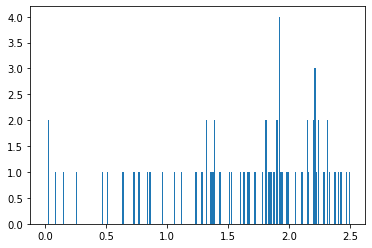

In [27]:
_ = plt.hist(hcal_clusterSum/1000,bins=np.linspace(0,2.5,250))

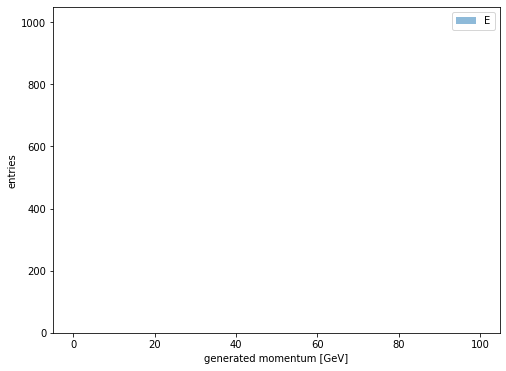

1000


In [28]:
fig = plt.figure( figsize=(8, 6))

#plt.hist(p,range=(0,100),bins=np.linspace(0,100,100),alpha=0.5,label="p")
plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5,label="E")
plt.legend()
plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

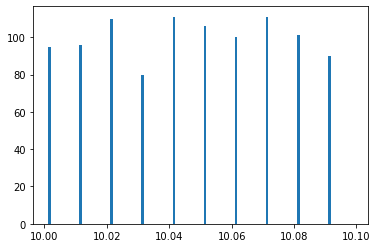

In [29]:
_ = plt.hist(gen_theta)